# Import dependencies

In [1]:

import os
import datetime
from pysolar.solar import *
if os.getcwd() != '/Users/matildemaccio/Projects/Python/Renovus/solarec-python/app':
    os.chdir('../../..')
from ml.model import get_data, load_model, resample_data, save_predictions
import pandas as pd
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)
pd.set_option('display.expand_frame_repr', True)

# Build input dataframe

In [2]:
cli_id = 19
gen_id = 8
loc_id = 20
start_date = datetime.datetime(2024,8,30)
end_date = start_date + datetime.timedelta(days=1, seconds=-1)

df, cli_id, loc_id, gen_id, start_date, end_date, loc_capacity, loc_lat, loc_long = get_data(start_date, end_date, cli_id, loc_id, gen_id, None)
model_df = resample_data(df)
ml_model = load_model(os.path.join('ml', 'models', 'cat_boost_model.pkl'), loc_capacity)

input_data = ml_model.generate_input(loc_lat, loc_long, model_df)


/Users/matildemaccio/Projects/Python/Renovus/solarec-python/.venv/lib/python3.10/site-packages/pysolar/solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \


In [3]:
print(len(df))
print(len(df) / 4)
print(len(model_df))
print(len(input_data))

104
26.0
25
25


In [4]:
input_data

,Temperature,Precipitation Total,Cloud Cover Total,Shortwave Radiation,day,season_0,season_1,season_2,season_3,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,Generated Power 1 Hour Lag,Hours Since Last Rain,Solar Zenith Angle
data_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-08-29 23:00:00,12.5850,0.0,19.75,0.00000,29,0,0,True,0,0,0,0,0,0,0,0,True,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,NaN,0,-54.618015
2024-08-30 00:00:00,12.2475,0.0,26.25,0.00000,30,0,0,True,0,0,0,0,0,0,0,0,True,0,0,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.00,0,-62.058245
2024-08-30 01:00:00,12.0000,0.0,30.00,0.00000,30,0,0,True,0,0,0,0,0,0,0,0,True,0,0,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.00,0,-63.806203
2024-08-30 02:00:00,12.0000,0.0,30.00,0.00000,30,0,0,True,0,0,0,0,0,0,0,0,True,0,0,0,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.00,0,-58.869775
2024-08-30 03:00:00,11.9175,0.0,30.00,0.00000,30,0,0,True,0,0,0,0,0,0,0,0,True,0,0,0,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.00,0,-49.666573
2024-08-30 04:00:00,11.5850,0.0,32.50,0.00000,30,0,0,True,0,0,0,0,0,0,0,0,True,0,0,0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.00,0,-38.503944
2024-08-30 05:00:00,11.2475,0.0,48.25,0.00000,30,0,0,True,0,0,0,0,0,0,0,0,True,0,0,0,0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.00,0,-26.509003
2024-08-30 06:00:00,11.0000,0.0,66.25,0.00000,30,0,0,True,0,0,0,0,0,0,0,0,True,0,0,0,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.00,0,-14.217391
2024-08-30 07:00:00,11.0000,0.0,41.75,0.00000,30,0,0,True,0,0,0,0,0,0,0,0,True,0,0,0,0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.00,0,-1.950235


# Predict

In [5]:
prediction = ml_model.predict(input_data)

In [6]:
len(prediction)

24

In [7]:

print(prediction)

                     Prediction
data_date                      
2024-08-30 00:00:00       0.000
2024-08-30 01:00:00       0.000
2024-08-30 02:00:00       0.000
2024-08-30 03:00:00       0.000
2024-08-30 04:00:00       0.000
2024-08-30 05:00:00       0.000
2024-08-30 06:00:00       0.000
2024-08-30 07:00:00       0.000
2024-08-30 08:00:00       1.173
2024-08-30 09:00:00       3.830
2024-08-30 10:00:00       3.864
2024-08-30 11:00:00       3.369
2024-08-30 12:00:00       3.072
2024-08-30 13:00:00       1.135
2024-08-30 14:00:00       1.240
2024-08-30 15:00:00       0.000
2024-08-30 16:00:00       0.267
2024-08-30 17:00:00       0.931
2024-08-30 18:00:00       0.000
2024-08-30 19:00:00       0.000
2024-08-30 20:00:00       0.000
2024-08-30 21:00:00       0.000
2024-08-30 22:00:00       0.000
2024-08-30 23:00:00       0.000


In [8]:
print(len(prediction))
print(len(df))
print(len(df)/ 4)
print(len(model_df))
print(len(input_data))

24
104
26.0
25
25


In [9]:
predictions = []
actual = []
for i, pred in prediction.iterrows():
    for j in range(4):
        new_index = i - datetime.timedelta(minutes=15*j)
        original_row = df.loc[new_index]
        data_pro_id = original_row['data_pro_id']
        actual_production = original_row['Generated Power']
        predicted_power = pred['Prediction']
        predictions.append(predicted_power)
        actual.append(actual_production)

In [10]:
print([(x,y) for x,y in zip(predictions, actual)])


[(0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.064), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.173, 1.44), (1.173, 1.06), (1.173, 0.388), (1.173, 0.27999999999999997), (3.83, 3.6319999999999997), (3.83, 3.5039999999999996), (3.83, 3.088), (3.83, 2.184), (3.864, 3.06), (3.864, 3.684), (3.864, 3.26), (3.864, 3.6799999999999997), (3.369, 2.7119999999999997), (3.369, 3.208), (3.369, 3.476), (3.369, 3.38), (3.072, 2.176), (3.072, 2.42), (3.072, 1.7959999999999998), (3.072, 1.8159999999999998), (1.135, 0.532), (1.135, 0.9119999999999999), (1.135, 0.9279999999999999), (1.135, 1.512), (1.24, 0.8), (1.24, 0.732), (1.24, 0.5840000000000001), (1.24, 0.476), (0.0, 0.8760000000000001), (0.0, 0.863999999999999

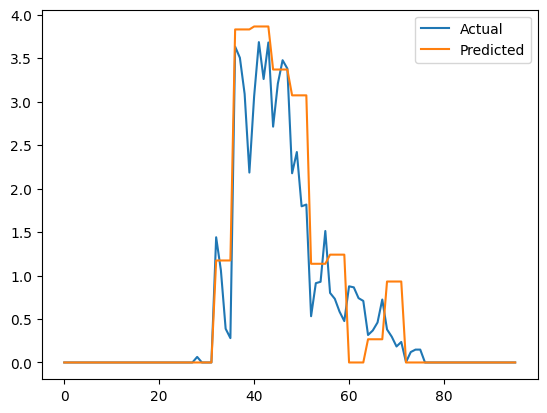

In [11]:
from matplotlib import pyplot as plt

plt.plot( actual, label='Actual')
plt.plot( predictions, label='Predicted')
#plt.plot(actual.index[:500], df['Shortwave Radiation'][:500] * 15000, label='Shortwave Radiation')
plt.legend()
plt.show()